In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
df.shape

(83448, 2)

In [4]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [7]:
## Remove Punctuation
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [8]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [9]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(
    lambda x: ' '.join(w for w in x.split() if w not in stop_words)
)

In [10]:
## Remove numbers
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)

In [11]:
import re
import emoji

def emojis_to_text(text):
    emoji_text = emoji.demojize(text, language='en')
    emoji_text = emoji_text.replace(":", " ")  # remove colon safely
    emoji_text = emoji_text.replace("_", " ")  # keep words readable
    return re.sub(r'\s+', ' ', emoji_text).strip()

df['text'] = df['text'].apply(emojis_to_text)

In [12]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get medircations online qnb ikud viagra...
2,0,computer connection cnn com wednesday escapenu...
3,1,university degree obtain prosperous future mon...
4,0,thanks answers guys know checked rsync manual ...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,1)
)

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [15]:
y = df['label']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(tfidf_matrix, y, test_size=0.3)

In [17]:
from sklearn.svm import SVC

In [18]:
svc_model = SVC(
      C = 1,
      kernel = 'linear',
      gamma = "scale"
)

svc_model.fit(x_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [19]:
y_pred = svc_model.predict(x_val)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print("\n", classification_report(y_val, y_pred))


               precision    recall  f1-score   support

           0       0.98      0.96      0.97     11791
           1       0.96      0.98      0.97     13244

    accuracy                           0.97     25035
   macro avg       0.97      0.97      0.97     25035
weighted avg       0.97      0.97      0.97     25035



<Axes: >

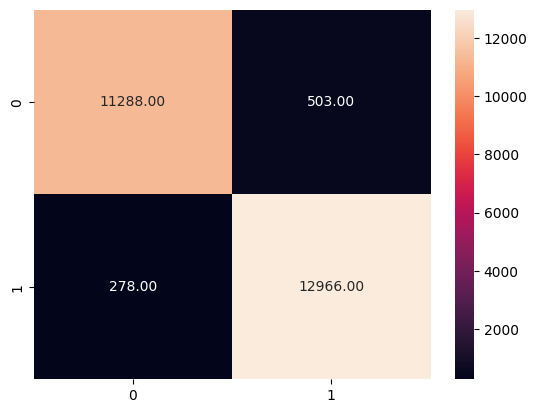

In [22]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt=".2f")